## 13.3 目标检测和边界框

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

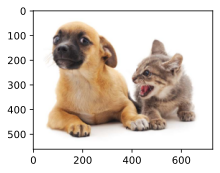

In [3]:
d2l.set_figsize()
img = d2l.plt.imread('../img/catdog.jpg')
d2l.plt.imshow(img)

### 13.3.1 边界框

In [4]:
# 标签转换函数
def box_corner_to_center(boxes):
  """
  从（左上，右下）转换到（中间，宽度，高度）
  因为boxes传入的时候形状 (num_boxes, 4)，其中列为：(x1, y1, x2, y2)
  因此，是boxes[:, 0] ...  
  """
  x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  cx = (x1 + x2) / 2
  cy = (y1 + y2) / 2
  w = x2 - x1
  h = y2 - y1
  boxes = torch.stack((cx, cy, w, h), axis=-1)
  return boxes

def box_center_to_corner(boxes):
  """从（中间，宽度，高度）转换到（左上，右下）"""
  cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
  x1 = cx - 0.5 * w
  y1 = cy - 0.5 * h
  x2 = cx + 0.5 * w
  y2 = cy + 0.5 * h
  boxes = torch.stack((x1, y1, x2, y2), axis=-1)
  return boxes

In [5]:
# bbox是边界框的英文缩写
# 定义两个边界框
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [6]:
# 验证函数的正确性

boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

In [7]:
# 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
def bbox_to_rect(bbox, color):
  # ((左上x,左上y),宽,高)
  return d2l.plt.Rectangle(
    xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
    fill=False, edgecolor=color, linewidth=2)

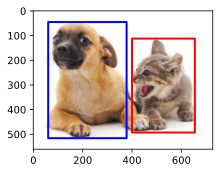

In [8]:
# 在图上添加边界框

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))

### 练习

1. 找到另一张图像，然后尝试标记包含该对象的边界框。比较标注边界框和标注类别哪个需要更长的时间？

标注类别的时间比较长。

In [ ]:
import torch

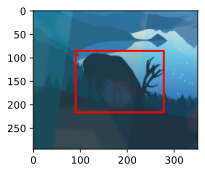

In [ ]:
# 设置图像大小，读取并查看图像
d2l.set_figsize()
img = d2l.plt.imread('../img/myimg-deer.png')
d2l.plt.imshow(img)

# bbox是边界框的英文缩写
dog_bbox = [90.0, 85.0, 278.0, 216.0]

# 在图上添加边界框
fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'red'))

2. 为什么box_corner_to_center和box_center_to_corner的输入参数的最内层维度总是4？

因为两种表示方式中，左下右上方式为：(x1,y1,x2,y2)

位置的方式为：(x, y, w, h)